In [35]:
### Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
## Reading the data
df = pd.read_csv("customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


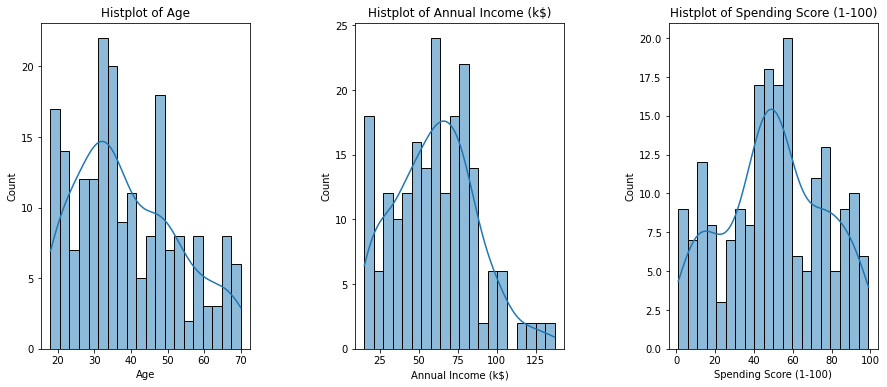

In [39]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for col in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(data=df, x=col, bins = 20, kde=True)
    plt.title('Histplot of {}'.format(col))
plt.show()

[]

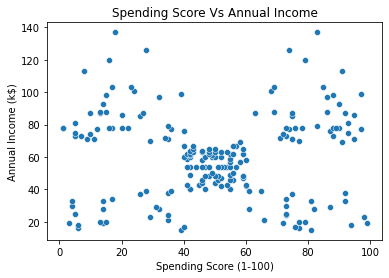

In [40]:
plt.title("Spending Score Vs Annual Income")
sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)")
plt.plot()

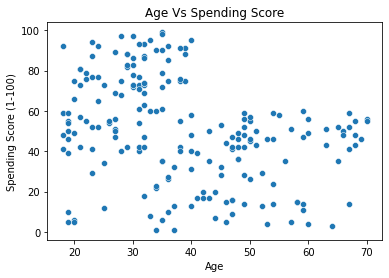

In [41]:
plt.title("Age Vs Spending Score")
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)")
plt.show()

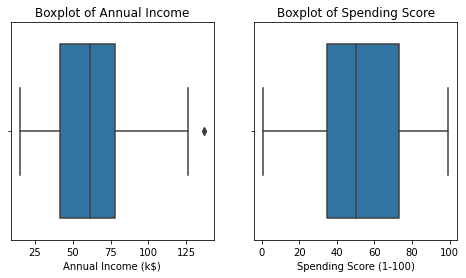

In [42]:
# Checking for any outliers as we will be using the K-Means Algorithm
# Box Plot for finding outliers
plt.figure(figsize=(8,4))
plt.subplots_adjust(hspace=.25)

plt.subplot(1,2,1)
plt.title("Boxplot of Annual Income")
sns.boxplot(x = df['Annual Income (k$)'])

plt.subplot(1,2,2)
plt.title("Boxplot of Spending Score")
sns.boxplot(x= df['Spending Score (1-100)'])

plt.show()

In [43]:
# Drop ID as it does not have any effect in analysis as well as the model
#df.drop('CustomerID', axis=1, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
# Perform One Hot Encoding for the Gender Column
df = pd.get_dummies(df, columns=['Gender'])
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [45]:
df.head(100)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
95,96,24,60,52,0,1
96,97,47,60,47,1,0
97,98,27,60,50,1,0
98,99,48,61,42,0,1


In [46]:
df.tail(100)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
100,101,23,62,41,1,0
101,102,49,62,48,1,0
102,103,67,62,59,0,1
103,104,26,62,55,0,1
104,105,49,62,56,0,1
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [47]:
# Drop Female or either male to avoid duplication
df.drop('Gender_Female', axis = 1, inplace = True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [48]:
# Importing all the necessary modules for predicting, finding right params and validation
from sklearn.cluster import KMeans

In [49]:
# Calculating the best possible cluster
wss = []
for cluster in range(1, 11):
    KM = KMeans(n_clusters = cluster)
    KM.fit(df)
    wss.append(KM.inertia_)

In [50]:
for index, rate in enumerate(wss):
    if index == 0:
        print("Cluster " + str(index) + " Diff in wss value: Not Applicable")
    else:
        print("Cluster " + str(index) + " Diff in wss value: " + str(wss[index - 1] - wss[index]))

Cluster 0 Diff in wss value: Not Applicable
Cluster 1 Diff in wss value: 588446.346228623
Cluster 2 Diff in wss value: 115681.20498850913
Cluster 3 Diff in wss value: 75983.31022295333
Cluster 4 Diff in wss value: 37895.47783513891
Cluster 5 Diff in wss value: 34868.16276367425
Cluster 6 Diff in wss value: 19464.790683281288
Cluster 7 Diff in wss value: 17026.54965371726
Cluster 8 Diff in wss value: 8903.28053896586
Cluster 9 Diff in wss value: 8342.051137230432


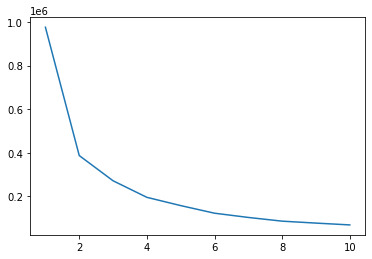

In [51]:
# Plot of wss
plt.plot(range(1,11), wss)

In [52]:
# Training the K-Means
k_means = KMeans(n_clusters = 5)
k_means.fit(df[['Annual Income (k$)' , 'Spending Score (1-100)']])
k_means_labels = k_means.labels_

In [53]:
# Adding the kmeans labels to our dataset for analysis
df['k_means_labels'] = k_means_labels
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,k_means_labels
0,1,19,15,39,1,3
1,2,21,15,81,1,0
2,3,20,16,6,0,3
3,4,23,16,77,0,0
4,5,31,17,40,0,3
...,...,...,...,...,...,...
195,196,35,120,79,0,4
196,197,45,126,28,0,2
197,198,32,126,74,1,4
198,199,32,137,18,1,2


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

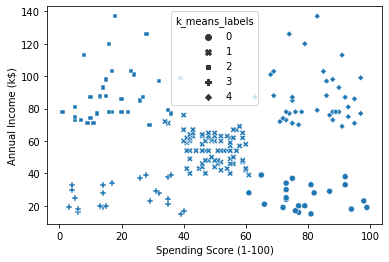

In [54]:
sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)", style="k_means_labels")

    Category 0 -  Low Income High Spending Category
    Category 1 -  Medium Income Medium Spending
    Category 2 -  High Income Low Spending Category
    Category 3 -  Low Income Low Spending Category
    Category 4 -  High Income High Spending Category

In [55]:
import pickle

In [56]:
filename = 'model.sav'

In [57]:
pickle.dump(k_means, open(filename, 'wb'))

In [87]:
loaded_kmeans = pickle.load(open(filename, 'rb'))
x = loaded_kmeans.predict([[10, 89]])

/Users/dinesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [88]:
x

array([0], dtype=int32)

In [77]:
import sqlite3

In [78]:
conn = sqlite3.connect('customers.db')

In [79]:
create_sql = 'CREATE TABLE IF NOT EXISTS customers (CustomerID INTEGER, Age INTEGER, Annual_Income INTEGER, Spending_Score INTEGER,	Gender_Male INTEGER, Category INTEGER)'
cursor = conn.cursor()
cursor.execute(create_sql)

In [83]:
for row in df.itertuples():
    insert_sql = f'INSERT into customers (CustomerID, Age, Annual_Income, Spending_Score, Gender_Male, Category) VALUES ( {row[1]}, {row[2]}, {row[3]}, {row[4]}, {row[5]}, {row[6]} )'
    cursor.execute(insert_sql)

In [84]:
conn.commit()